# Importing the required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score

# Loading the dataset into pandas dataframe

In [2]:
df = pd.read_csv('quora_duplicate_questions.tsv',sep = '\t')

# Data Preprocessing

In [3]:
df = df.sample(20000)

In [4]:
df.head(5)    # Viewing the dataset

,id,qid1,qid2,question1,question2,is_duplicate
208742,208742,312823,312824,Can we connect a microphone with a small speaker?,Can we connect microphone directly to speaker?,1
111830,111830,183070,183071,How do I open a private school?,How can I create a private school?,1
55627,55627,98049,98050,What is mental power?,What factors determine our mental processing p...,0
388441,388441,520844,520845,What is the appeal of C#?,What is the appeal of Java?,0
183264,183264,280282,280283,Why don't doctors who suffer myopia undergo re...,Most doctors who have myopia don't have the su...,1


In [5]:
df = df.drop('id',1)    # Dropping the not required id column

/var/folders/vs/vqsy9fl90f132y17y_bk2sdm0000gn/T/ipykernel_4376/3554518865.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id',1)    # Dropping the not required id column


In [6]:
df.head(5)          # Viewing the dataset

,qid1,qid2,question1,question2,is_duplicate
208742,312823,312824,Can we connect a microphone with a small speaker?,Can we connect microphone directly to speaker?,1
111830,183070,183071,How do I open a private school?,How can I create a private school?,1
55627,98049,98050,What is mental power?,What factors determine our mental processing p...,0
388441,520844,520845,What is the appeal of C#?,What is the appeal of Java?,0
183264,280282,280283,Why don't doctors who suffer myopia undergo re...,Most doctors who have myopia don't have the su...,1


In [7]:
df.shape          # Dimensions of the dataset

(20000, 5)

In [8]:
df = df.dropna(how='any',axis=0)    # Dropping rows with null values

In [9]:
df.info()                  # Getting Information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 208742 to 234411
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   qid1          20000 non-null  int64 
 1   qid2          20000 non-null  int64 
 2   question1     20000 non-null  object
 3   question2     20000 non-null  object
 4   is_duplicate  20000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 937.5+ KB


# Percentage of Duplicate and Non-Duplicate Question Pairs

0    12647
1     7353
Name: is_duplicate, dtype: int64
0    63.235
1    36.765
Name: is_duplicate, dtype: float64


<AxesSubplot:>

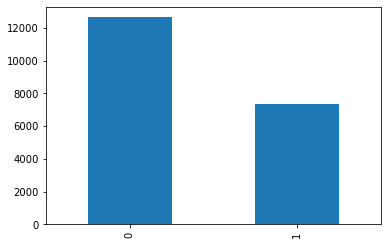

In [10]:
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)
df["is_duplicate"].value_counts().plot(kind="bar")

# Checking the number of unique questions and number of repeated question

In [11]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 37807
Number of questions getting repeated 1768


# Histogram of repeated questions

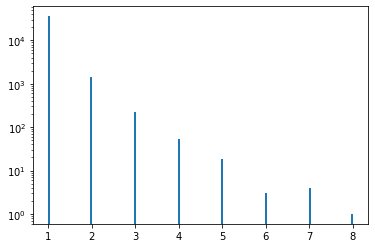

In [12]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Checking what is the maximum number of times a question is repeated and also the frequency of each question

In [13]:
qids = pd.Series(list(df['qid1']) + list(df['qid2'])) #Creating a dataframe that contains the question id of both quid1 and quid2
unique_qs = len(np.unique(qids))  #Numpy array to filter down all qniue elements
qs_morethan_onetime = np.sum(qids.value_counts() > 1)   # Counts any question that have been repeated more than one time

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) # Taking the frequency of all question and printing the max of them

q_vals=qids.value_counts()
print(q_vals)

q_vals=q_vals.values

Max number of times a single question is repeated: 8

2561      8
30782     7
17811     7
4044      7
9662      7
         ..
458367    1
21137     1
468148    1
443841    1
344907    1
Length: 37807, dtype: int64


# Looking at the most frequently asked questions in the choosen sample

In [15]:
print(df.loc[df['qid1']==2561]['question1'].head(1).values)
print('='*50)
print(" "*50)
print(df.loc[df['qid1']==4044]['question1'].head(1).values)
print('='*50)
print(" "*50)
print(df.loc[df['qid1']==17811]['question1'].head(1).values)

["What's the easiest way to make money online?"]
                                                  
['How can I lose weight quickly?']
                                                  
['Why do so many people ask questions on Quora that can be easily answered by any number of legitimate sources on the Web? Have they not heard of Google or Bing?']


# Creating a dataframe containing question1 and question2 columns only

In [16]:
que_df = df[["question1","question2"]]
que_df.head()

,question1,question2
208742,Can we connect a microphone with a small speaker?,Can we connect microphone directly to speaker?
111830,How do I open a private school?,How can I create a private school?
55627,What is mental power?,What factors determine our mental processing p...
388441,What is the appeal of C#?,What is the appeal of Java?
183264,Why don't doctors who suffer myopia undergo re...,Most doctors who have myopia don't have the su...


# Taking all the questions into a list

In [17]:
questions = list(que_df["question1"]) + list(que_df["question2"])
print(len(questions))

40000


# Applying CountVectorizer and creating a new data frame

In [18]:
cv = CountVectorizer(max_features=3000) #taking only 2000 features
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) #splitting questions
temp_df1 = pd.DataFrame(q1_arr,index=que_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=que_df.index)
#concating two dataframes
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)

# Checking the dimension and viewing the created dataframe

In [19]:
temp_df.shape    
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
208742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
357332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Adding the is_duplicate column from our original dataframe

In [20]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
208742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278186,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
357332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

In [21]:
#feature engineering
temp_df["q1_len"] = df["question1"].str.len()
temp_df["q2_len"] = df["question2"].str.len()

In [22]:
temp_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,2993,2994,2995,2996,2997,2998,2999,is_duplicate,q1_len,q2_len
139325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,45,31
291998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40,26
109626,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,66,63


In [23]:
temp_df["q1_num_words"] = df["question1"].apply(lambda row: len(row.split(" ")))
temp_df["q2_num_words"] = df["question2"].apply(lambda row: len(row.split(" ")))
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2995,2996,2997,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
208742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,49,46,9,7
111830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,31,34,7,7
55627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,21,51,4,7
388441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,25,27,6,6
183264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,70,71,11,13


In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [25]:
temp_df['word_total'] = df.apply(total_words, axis=1)
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2996,2997,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total
208742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,49,46,9,7,15
111830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,31,34,7,7,14
55627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21,51,4,7,11
388441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25,27,6,6,12
183264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,70,71,11,13,23


In [26]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [27]:
temp_df['word_common'] = df.apply(common_words, axis=1)
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2997,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total,word_common
208742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,49,46,9,7,15,5
111830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,31,34,7,7,14,5
55627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,21,51,4,7,11,3
388441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,25,27,6,6,12,5
183264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,70,71,11,13,23,4


In [28]:
temp_df['word_share'] = round(temp_df['word_common']/temp_df['word_total'],2)
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total,word_common,word_share
208742,0,0,0,0,0,0,0,0,0,0,...,0,0,1,49,46,9,7,15,5,0.33
111830,0,0,0,0,0,0,0,0,0,0,...,0,0,1,31,34,7,7,14,5,0.36
55627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,21,51,4,7,11,3,0.27
388441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,25,27,6,6,12,5,0.42
183264,0,0,0,0,0,0,0,0,0,0,...,0,0,1,70,71,11,13,23,4,0.17


# Dividing the dataframe into input and output frames

In [29]:
X = temp_df.drop(["is_duplicate"],axis=1)
y = temp_df["is_duplicate"]

# Splitting into train and test data

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Building Model using Random Forest Classifier and checking the test accuracy

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.766
[[2248  272]
 [ 664  816]]
0.75
0.5513513513513514


# Building Model using Logistic Regression Classifier and checking the test accuracy

In [32]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.74925
[[2147  373]
 [ 630  850]]
0.6950122649223222
0.5743243243243243


/Users/nilaypatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
